In [95]:
import pandas as pd
import numpy

In [96]:
from sklearn.datasets import make_regression
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [97]:
X, y = make_regression(n_samples=10, n_features=3)

In [98]:
# Features
df = pd.DataFrame(X)

In [99]:
# Target
df['y_true'] = y

In [100]:
df

,0,1,2,y_true
0,-0.216484,0.151740,-1.001907,-68.403556
1,-0.698212,-0.388802,-1.882398,-218.351267
2,-1.621164,1.667315,-0.902866,-63.764107
3,-0.023036,0.360681,-0.145807,21.559170
4,0.273560,-1.094409,-0.798985,-120.615904
5,-1.193951,-0.684039,1.358945,-97.416461
6,-1.169485,0.904980,-1.249069,-109.240944
7,-0.558089,0.765144,-0.057544,10.733151
8,-0.045226,0.131503,0.555975,41.176231
9,-0.498503,0.049494,-0.286142,-62.090654


In [101]:
# Let's make a first prediction based on the target average. We gonna boost this constant prediction
df['y_pred_0'] = df['y_true'].mean()
df

,0,1,2,y_true,y_pred_0
0,-0.216484,0.151740,-1.001907,-68.403556,-66.641434
1,-0.698212,-0.388802,-1.882398,-218.351267,-66.641434
2,-1.621164,1.667315,-0.902866,-63.764107,-66.641434
3,-0.023036,0.360681,-0.145807,21.559170,-66.641434
4,0.273560,-1.094409,-0.798985,-120.615904,-66.641434
5,-1.193951,-0.684039,1.358945,-97.416461,-66.641434
6,-1.169485,0.904980,-1.249069,-109.240944,-66.641434
7,-0.558089,0.765144,-0.057544,10.733151,-66.641434
8,-0.045226,0.131503,0.555975,41.176231,-66.641434
9,-0.498503,0.049494,-0.286142,-62.090654,-66.641434


In [102]:
# In average my model error is 82.5
mean_absolute_error(df['y_true'], df['y_pred_0'])

56.16419229605884

In [103]:
# To start doing gradian boosting we have to calculate residuals (loss). 
# Each tree in gradient boosting teaches on the mistakes from the prev tree. Eech tree teachs on residual.
# How much we need for each y_pred to get y_true
df['residual_0'] = df['y_true'] - df['y_pred_0']
df

,0,1,2,y_true,y_pred_0,residual_0
0,-0.216484,0.151740,-1.001907,-68.403556,-66.641434,-1.762122
1,-0.698212,-0.388802,-1.882398,-218.351267,-66.641434,-151.709833
2,-1.621164,1.667315,-0.902866,-63.764107,-66.641434,2.877327
3,-0.023036,0.360681,-0.145807,21.559170,-66.641434,88.200604
4,0.273560,-1.094409,-0.798985,-120.615904,-66.641434,-53.974470
5,-1.193951,-0.684039,1.358945,-97.416461,-66.641434,-30.775027
6,-1.169485,0.904980,-1.249069,-109.240944,-66.641434,-42.599510
7,-0.558089,0.765144,-0.057544,10.733151,-66.641434,77.374586
8,-0.045226,0.131503,0.555975,41.176231,-66.641434,107.817665
9,-0.498503,0.049494,-0.286142,-62.090654,-66.641434,4.550780


In [104]:
# Our first tree (from up to down)
from sklearn.tree import DecisionTreeRegressor
tree1 = DecisionTreeRegressor(max_depth=1)

In [105]:
tree1.fit(df[[0,1,2]], df['residual_0'])

DecisionTreeRegressor(max_depth=1)

In [106]:
df['tree_pred_1'] = tree1.predict(df[[0,1,2]])

In [107]:
df

,0,1,2,y_true,y_pred_0,residual_0,tree_pred_1
0,-0.216484,0.151740,-1.001907,-68.403556,-66.641434,-1.762122,33.779904
1,-0.698212,-0.388802,-1.882398,-218.351267,-66.641434,-151.709833,-78.819777
2,-1.621164,1.667315,-0.902866,-63.764107,-66.641434,2.877327,33.779904
3,-0.023036,0.360681,-0.145807,21.559170,-66.641434,88.200604,33.779904
4,0.273560,-1.094409,-0.798985,-120.615904,-66.641434,-53.974470,-78.819777
5,-1.193951,-0.684039,1.358945,-97.416461,-66.641434,-30.775027,-78.819777
6,-1.169485,0.904980,-1.249069,-109.240944,-66.641434,-42.599510,33.779904
7,-0.558089,0.765144,-0.057544,10.733151,-66.641434,77.374586,33.779904
8,-0.045226,0.131503,0.555975,41.176231,-66.641434,107.817665,33.779904
9,-0.498503,0.049494,-0.286142,-62.090654,-66.641434,4.550780,33.779904


[Text(0.5, 0.75, 'x[1] <= -0.17\nsquared_error = 5411.385\nsamples = 10\nvalue = -0.0'),
 Text(0.25, 0.25, 'squared_error = 2746.183\nsamples = 3\nvalue = -78.82'),
 Text(0.375, 0.5, 'True  '),
 Text(0.75, 0.25, 'squared_error = 2750.009\nsamples = 7\nvalue = 33.78'),
 Text(0.625, 0.5, '  False')]

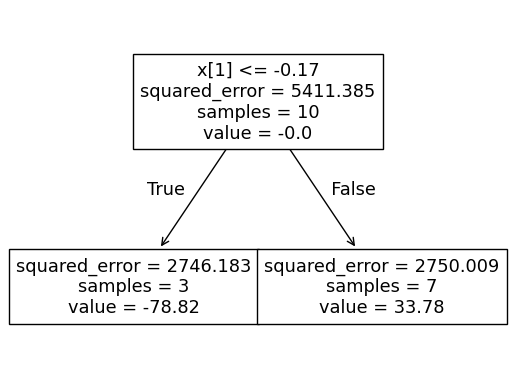

In [108]:
# What is tree essentially, if one of the features is > more than some value, then .., else..
from sklearn.tree import plot_tree
plot_tree(tree1)

# We might see that this tree somehow realized that the best feature to train is x[2]

In [109]:
# Now let's learn our algoritm 
# If we have a big nu, then we can miss our closest prediction
nu = 0.1

df['y_pred_1'] = df['y_pred_0'] + nu * df['tree_pred_1']

In [110]:
df

,0,1,2,y_true,y_pred_0,residual_0,tree_pred_1,y_pred_1
0,-0.216484,0.151740,-1.001907,-68.403556,-66.641434,-1.762122,33.779904,-63.263444
1,-0.698212,-0.388802,-1.882398,-218.351267,-66.641434,-151.709833,-78.819777,-74.523412
2,-1.621164,1.667315,-0.902866,-63.764107,-66.641434,2.877327,33.779904,-63.263444
3,-0.023036,0.360681,-0.145807,21.559170,-66.641434,88.200604,33.779904,-63.263444
4,0.273560,-1.094409,-0.798985,-120.615904,-66.641434,-53.974470,-78.819777,-74.523412
5,-1.193951,-0.684039,1.358945,-97.416461,-66.641434,-30.775027,-78.819777,-74.523412
6,-1.169485,0.904980,-1.249069,-109.240944,-66.641434,-42.599510,33.779904,-63.263444
7,-0.558089,0.765144,-0.057544,10.733151,-66.641434,77.374586,33.779904,-63.263444
8,-0.045226,0.131503,0.555975,41.176231,-66.641434,107.817665,33.779904,-63.263444
9,-0.498503,0.049494,-0.286142,-62.090654,-66.641434,4.550780,33.779904,-63.263444


In [111]:
# Let's calculate an error 

In [112]:
mean_absolute_error(df['y_true'], df['y_pred_0'])

56.16419229605884

In [113]:
mean_absolute_error(df['y_true'], df['y_pred_1'])

52.886334596177335

In [114]:
df['residual_1'] = df['y_true'] - df['y_pred_1']

In [115]:
df

,0,1,2,y_true,y_pred_0,residual_0,tree_pred_1,y_pred_1,residual_1
0,-0.216484,0.151740,-1.001907,-68.403556,-66.641434,-1.762122,33.779904,-63.263444,-5.140112
1,-0.698212,-0.388802,-1.882398,-218.351267,-66.641434,-151.709833,-78.819777,-74.523412,-143.827855
2,-1.621164,1.667315,-0.902866,-63.764107,-66.641434,2.877327,33.779904,-63.263444,-0.500664
3,-0.023036,0.360681,-0.145807,21.559170,-66.641434,88.200604,33.779904,-63.263444,84.822614
4,0.273560,-1.094409,-0.798985,-120.615904,-66.641434,-53.974470,-78.819777,-74.523412,-46.092492
5,-1.193951,-0.684039,1.358945,-97.416461,-66.641434,-30.775027,-78.819777,-74.523412,-22.893049
6,-1.169485,0.904980,-1.249069,-109.240944,-66.641434,-42.599510,33.779904,-63.263444,-45.977501
7,-0.558089,0.765144,-0.057544,10.733151,-66.641434,77.374586,33.779904,-63.263444,73.996595
8,-0.045226,0.131503,0.555975,41.176231,-66.641434,107.817665,33.779904,-63.263444,104.439674
9,-0.498503,0.049494,-0.286142,-62.090654,-66.641434,4.550780,33.779904,-63.263444,1.172790


In [116]:
tree2 = DecisionTreeRegressor(max_depth=1)

In [117]:
tree2.fit(df[[0,1,2]], df['residual_1'])

DecisionTreeRegressor(max_depth=1)

In [118]:
df['y_pred_2'] = df['y_pred_1'] + nu * tree2.predict(df[[0,1,2]])

In [119]:
df

,0,1,2,y_true,y_pred_0,residual_0,tree_pred_1,y_pred_1,residual_1,y_pred_2
0,-0.216484,0.151740,-1.001907,-68.403556,-66.641434,-1.762122,33.779904,-63.263444,-5.140112,-67.269541
1,-0.698212,-0.388802,-1.882398,-218.351267,-66.641434,-151.709833,-78.819777,-74.523412,-143.827855,-78.529509
2,-1.621164,1.667315,-0.902866,-63.764107,-66.641434,2.877327,33.779904,-63.263444,-0.500664,-67.269541
3,-0.023036,0.360681,-0.145807,21.559170,-66.641434,88.200604,33.779904,-63.263444,84.822614,-57.254298
4,0.273560,-1.094409,-0.798985,-120.615904,-66.641434,-53.974470,-78.819777,-74.523412,-46.092492,-78.529509
5,-1.193951,-0.684039,1.358945,-97.416461,-66.641434,-30.775027,-78.819777,-74.523412,-22.893049,-68.514266
6,-1.169485,0.904980,-1.249069,-109.240944,-66.641434,-42.599510,33.779904,-63.263444,-45.977501,-67.269541
7,-0.558089,0.765144,-0.057544,10.733151,-66.641434,77.374586,33.779904,-63.263444,73.996595,-57.254298
8,-0.045226,0.131503,0.555975,41.176231,-66.641434,107.817665,33.779904,-63.263444,104.439674,-57.254298
9,-0.498503,0.049494,-0.286142,-62.090654,-66.641434,4.550780,33.779904,-63.263444,1.172790,-67.269541


In [120]:
print(mean_absolute_error(df['y_true'], df['y_pred_0']))
print(mean_absolute_error(df['y_true'], df['y_pred_1']))
print(mean_absolute_error(df['y_true'], df['y_pred_2']))

56.16419229605884
52.886334596177335
50.783153257765534


In [121]:
df = df[[0,1,2, 'y_true']].copy()

In [122]:
df

,0,1,2,y_true
0,-0.216484,0.151740,-1.001907,-68.403556
1,-0.698212,-0.388802,-1.882398,-218.351267
2,-1.621164,1.667315,-0.902866,-63.764107
3,-0.023036,0.360681,-0.145807,21.559170
4,0.273560,-1.094409,-0.798985,-120.615904
5,-1.193951,-0.684039,1.358945,-97.416461
6,-1.169485,0.904980,-1.249069,-109.240944
7,-0.558089,0.765144,-0.057544,10.733151
8,-0.045226,0.131503,0.555975,41.176231
9,-0.498503,0.049494,-0.286142,-62.090654


In [123]:
# Let's make it via loop, for now for 10 trees
# We need to keep trees to use them after data which our model didn't see before
n = 10
nu = 0.1
trees = []
df['y_pred_0'] = df['y_true'].mean()

In [124]:
for i in range(n):
    # Calculate residuals
    df[f'residual_{i}'] = df['y_true'] - df[f'y_pred_{i}']
    
    # Train a simple decision tree regressor
    tree = DecisionTreeRegressor(max_depth=1)
    tree.fit(df[[0, 1, 2]], df[f'residual_{i}'])
    
    # Update predictions with the new tree
    df[f'tree_pred_{i + 1}'] = df[f'y_pred_{i}'] + nu * tree.predict(df[[0, 1, 2]])
    
    # Update y_pred to reflect the new boosted prediction
    df[f'y_pred_{i + 1}'] = df[f'tree_pred_{i + 1}']
    
    # Save the tree for later use
    trees.append(tree)
    
    # Print MAE to monitor performance
    print(mean_absolute_error(df['y_true'], df[f'y_pred_{i + 1}']))

52.886334596177335
50.783153257765534
49.22957817101615
46.55423135134023
44.638269244410836
42.655570388439045
40.59413451969753
38.68474653040308
36.69802672448001
35.61656987294323


In [125]:
df

,0,1,2,y_true,y_pred_0,residual_0,tree_pred_1,y_pred_1,residual_1,tree_pred_2,y_pred_2,residual_2,tree_pred_3,y_pred_3,residual_3,tree_pred_4,y_pred_4,residual_4,tree_pred_5,y_pred_5,residual_5,tree_pred_6,y_pred_6,residual_6,tree_pred_7,y_pred_7,residual_7,tree_pred_8,y_pred_8,residual_8,tree_pred_9,y_pred_9,residual_9,tree_pred_10,y_pred_10
0,-0.216484,0.151740,-1.001907,-68.403556,-66.641434,-1.762122,-63.263444,-63.263444,-5.140112,-67.269541,-67.269541,-1.134015,-65.715966,-65.715966,-2.687590,-62.859747,-62.859747,-5.543809,-66.329927,-66.329927,-2.073629,-64.347228,-64.347228,-4.056328,-61.858067,-61.858067,-6.545489,-64.821392,-64.821392,-3.582164,-62.602313,-62.602313,-5.801243,-60.970438,-60.970438
1,-0.698212,-0.388802,-1.882398,-218.351267,-66.641434,-151.709833,-74.523412,-74.523412,-143.827855,-78.529509,-78.529509,-139.821758,-92.511685,-92.511685,-125.839582,-99.176196,-99.176196,-119.175071,-102.646376,-102.646376,-115.704891,-110.577171,-110.577171,-107.774096,-116.385215,-116.385215,-101.966052,-119.348539,-119.348539,-99.002728,-124.526390,-124.526390,-93.824877,-131.053890,-131.053890
2,-1.621164,1.667315,-0.902866,-63.764107,-66.641434,2.877327,-63.263444,-63.263444,-0.500664,-67.269541,-67.269541,3.505434,-65.715966,-65.715966,1.951859,-62.859747,-62.859747,-0.904360,-66.329927,-66.329927,2.565820,-64.347228,-64.347228,0.583121,-61.858067,-61.858067,-1.906041,-64.821392,-64.821392,1.057284,-62.602313,-62.602313,-1.161795,-60.970438,-60.970438
3,-0.023036,0.360681,-0.145807,21.559170,-66.641434,88.200604,-63.263444,-63.263444,84.822614,-57.254298,-57.254298,78.813468,-55.700723,-55.700723,77.259893,-52.844504,-52.844504,74.403674,-47.639234,-47.639234,69.198404,-45.656535,-45.656535,67.215705,-43.167374,-43.167374,64.726544,-38.722386,-38.722386,60.281556,-36.503308,-36.503308,58.062478,-34.871433,-34.871433
4,0.273560,-1.094409,-0.798985,-120.615904,-66.641434,-53.974470,-74.523412,-74.523412,-46.092492,-78.529509,-78.529509,-42.086395,-76.975934,-76.975934,-43.639970,-83.640445,-83.640445,-36.975459,-87.110625,-87.110625,-33.505279,-85.127926,-85.127926,-35.487978,-90.935969,-90.935969,-29.679935,-93.899294,-93.899294,-26.716610,-99.077145,-99.077145,-21.538760,-97.445269,-97.445269
5,-1.193951,-0.684039,1.358945,-97.416461,-66.641434,-30.775027,-74.523412,-74.523412,-22.893049,-68.514266,-68.514266,-28.902195,-66.960691,-66.960691,-30.455770,-73.625202,-73.625202,-23.791260,-68.419932,-68.419932,-28.996530,-66.437233,-66.437233,-30.979229,-72.245276,-72.245276,-25.171185,-67.800289,-67.800289,-29.616172,-72.978139,-72.978139,-24.438322,-71.346264,-71.346264
6,-1.169485,0.904980,-1.249069,-109.240944,-66.641434,-42.599510,-63.263444,-63.263444,-45.977501,-67.269541,-67.269541,-41.971403,-65.715966,-65.715966,-43.524978,-62.859747,-62.859747,-46.381197,-66.329927,-66.329927,-42.911017,-74.260723,-74.260723,-34.980222,-71.771561,-71.771561,-37.469383,-74.734886,-74.734886,-34.506059,-72.515807,-72.515807,-36.725137,-79.043308,-79.043308
7,-0.558089,0.765144,-0.057544,10.733151,-66.641434,77.374586,-63.263444,-63.263444,73.996595,-57.254298,-57.254298,67.987449,-55.700723,-55.700723,66.433874,-52.844504,-52.844504,63.577655,-47.639234,-47.639234,58.372385,-45.656535,-45.656535,56.389686,-43.167374,-43.167374,53.900525,-38.722386,-38.722386,49.455538,-36.503308,-36.503308,47.236459,-34.871433,-34.871433
8,-0.045226,0.131503,0.555975,41.176231,-66.641434,107.817665,-63.263444,-63.263444,104.439674,-57.254298,-57.254298,98.430529,-55.700723,-55.700723,96.876954,-52.844504,-52.844504,94.020735,-47.639234,-47.639234,88.815465,-45.656535,-45.656535,86.832766,-43.167374,-43.167374,84.343604,-38.722386,-38.722386,79.898617,-36.503308,-36.503308,77.679538,-34.871433,-34.871433
9,-0.498503,0.049494,-0.286142,-62.090654,-66.641434,4.550780,-63.263444,-63.263444,1.172790,-67.269541,-67.269541,5.178887,-65.715966,-65.715966,3.625312,-62.859747,-62.859747,0.769093,-66.329927,-66.329927,4.239273,-64.347228,-64.347228,2.2

In [126]:
# lets say we haev test data
test = df[[0,1,2]].copy()

In [127]:
test

,0,1,2
0,-0.216484,0.151740,-1.001907
1,-0.698212,-0.388802,-1.882398
2,-1.621164,1.667315,-0.902866
3,-0.023036,0.360681,-0.145807
4,0.273560,-1.094409,-0.798985
5,-1.193951,-0.684039,1.358945
6,-1.169485,0.904980,-1.249069
7,-0.558089,0.765144,-0.057544
8,-0.045226,0.131503,0.555975
9,-0.498503,0.049494,-0.286142


In [128]:
test['y_pred'] = df['y_true'].mean()

In [129]:
test

,0,1,2,y_pred
0,-0.216484,0.151740,-1.001907,-66.641434
1,-0.698212,-0.388802,-1.882398,-66.641434
2,-1.621164,1.667315,-0.902866,-66.641434
3,-0.023036,0.360681,-0.145807,-66.641434
4,0.273560,-1.094409,-0.798985,-66.641434
5,-1.193951,-0.684039,1.358945,-66.641434
6,-1.169485,0.904980,-1.249069,-66.641434
7,-0.558089,0.765144,-0.057544,-66.641434
8,-0.045226,0.131503,0.555975,-66.641434
9,-0.498503,0.049494,-0.286142,-66.641434


In [130]:
for tree in trees:
    test['y_pred'] = test['y_pred'] + nu * tree.predict(df[[0,1,2]])

In [131]:
test

,0,1,2,y_pred
0,-0.216484,0.151740,-1.001907,-60.970438
1,-0.698212,-0.388802,-1.882398,-131.053890
2,-1.621164,1.667315,-0.902866,-60.970438
3,-0.023036,0.360681,-0.145807,-34.871433
4,0.273560,-1.094409,-0.798985,-97.445269
5,-1.193951,-0.684039,1.358945,-71.346264
6,-1.169485,0.904980,-1.249069,-79.043308
7,-0.558089,0.765144,-0.057544,-34.871433
8,-0.045226,0.131503,0.555975,-34.871433
9,-0.498503,0.049494,-0.286142,-60.970438


In [132]:
df

,0,1,2,y_true,y_pred_0,residual_0,tree_pred_1,y_pred_1,residual_1,tree_pred_2,y_pred_2,residual_2,tree_pred_3,y_pred_3,residual_3,tree_pred_4,y_pred_4,residual_4,tree_pred_5,y_pred_5,residual_5,tree_pred_6,y_pred_6,residual_6,tree_pred_7,y_pred_7,residual_7,tree_pred_8,y_pred_8,residual_8,tree_pred_9,y_pred_9,residual_9,tree_pred_10,y_pred_10
0,-0.216484,0.151740,-1.001907,-68.403556,-66.641434,-1.762122,-63.263444,-63.263444,-5.140112,-67.269541,-67.269541,-1.134015,-65.715966,-65.715966,-2.687590,-62.859747,-62.859747,-5.543809,-66.329927,-66.329927,-2.073629,-64.347228,-64.347228,-4.056328,-61.858067,-61.858067,-6.545489,-64.821392,-64.821392,-3.582164,-62.602313,-62.602313,-5.801243,-60.970438,-60.970438
1,-0.698212,-0.388802,-1.882398,-218.351267,-66.641434,-151.709833,-74.523412,-74.523412,-143.827855,-78.529509,-78.529509,-139.821758,-92.511685,-92.511685,-125.839582,-99.176196,-99.176196,-119.175071,-102.646376,-102.646376,-115.704891,-110.577171,-110.577171,-107.774096,-116.385215,-116.385215,-101.966052,-119.348539,-119.348539,-99.002728,-124.526390,-124.526390,-93.824877,-131.053890,-131.053890
2,-1.621164,1.667315,-0.902866,-63.764107,-66.641434,2.877327,-63.263444,-63.263444,-0.500664,-67.269541,-67.269541,3.505434,-65.715966,-65.715966,1.951859,-62.859747,-62.859747,-0.904360,-66.329927,-66.329927,2.565820,-64.347228,-64.347228,0.583121,-61.858067,-61.858067,-1.906041,-64.821392,-64.821392,1.057284,-62.602313,-62.602313,-1.161795,-60.970438,-60.970438
3,-0.023036,0.360681,-0.145807,21.559170,-66.641434,88.200604,-63.263444,-63.263444,84.822614,-57.254298,-57.254298,78.813468,-55.700723,-55.700723,77.259893,-52.844504,-52.844504,74.403674,-47.639234,-47.639234,69.198404,-45.656535,-45.656535,67.215705,-43.167374,-43.167374,64.726544,-38.722386,-38.722386,60.281556,-36.503308,-36.503308,58.062478,-34.871433,-34.871433
4,0.273560,-1.094409,-0.798985,-120.615904,-66.641434,-53.974470,-74.523412,-74.523412,-46.092492,-78.529509,-78.529509,-42.086395,-76.975934,-76.975934,-43.639970,-83.640445,-83.640445,-36.975459,-87.110625,-87.110625,-33.505279,-85.127926,-85.127926,-35.487978,-90.935969,-90.935969,-29.679935,-93.899294,-93.899294,-26.716610,-99.077145,-99.077145,-21.538760,-97.445269,-97.445269
5,-1.193951,-0.684039,1.358945,-97.416461,-66.641434,-30.775027,-74.523412,-74.523412,-22.893049,-68.514266,-68.514266,-28.902195,-66.960691,-66.960691,-30.455770,-73.625202,-73.625202,-23.791260,-68.419932,-68.419932,-28.996530,-66.437233,-66.437233,-30.979229,-72.245276,-72.245276,-25.171185,-67.800289,-67.800289,-29.616172,-72.978139,-72.978139,-24.438322,-71.346264,-71.346264
6,-1.169485,0.904980,-1.249069,-109.240944,-66.641434,-42.599510,-63.263444,-63.263444,-45.977501,-67.269541,-67.269541,-41.971403,-65.715966,-65.715966,-43.524978,-62.859747,-62.859747,-46.381197,-66.329927,-66.329927,-42.911017,-74.260723,-74.260723,-34.980222,-71.771561,-71.771561,-37.469383,-74.734886,-74.734886,-34.506059,-72.515807,-72.515807,-36.725137,-79.043308,-79.043308
7,-0.558089,0.765144,-0.057544,10.733151,-66.641434,77.374586,-63.263444,-63.263444,73.996595,-57.254298,-57.254298,67.987449,-55.700723,-55.700723,66.433874,-52.844504,-52.844504,63.577655,-47.639234,-47.639234,58.372385,-45.656535,-45.656535,56.389686,-43.167374,-43.167374,53.900525,-38.722386,-38.722386,49.455538,-36.503308,-36.503308,47.236459,-34.871433,-34.871433
8,-0.045226,0.131503,0.555975,41.176231,-66.641434,107.817665,-63.263444,-63.263444,104.439674,-57.254298,-57.254298,98.430529,-55.700723,-55.700723,96.876954,-52.844504,-52.844504,94.020735,-47.639234,-47.639234,88.815465,-45.656535,-45.656535,86.832766,-43.167374,-43.167374,84.343604,-38.722386,-38.722386,79.898617,-36.503308,-36.503308,77.679538,-34.871433,-34.871433
9,-0.498503,0.049494,-0.286142,-62.090654,-66.641434,4.550780,-63.263444,-63.263444,1.172790,-67.269541,-67.269541,5.178887,-65.715966,-65.715966,3.625312,-62.859747,-62.859747,0.769093,-66.329927,-66.329927,4.239273,-64.347228,-64.347228,2.2